In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)

In [2]:
# prevediamo il prezzo delle case di Boston
from IPython.display import display, Math

display(Math(r'y(x_1, x_2, \dots, x_n) = w_0 + \sum_{i=1}^{m} w_i x_i'))


<IPython.core.display.Math object>

In [3]:
#info dataset

print(boston.data.shape)
print(boston.keys())
print(boston.feature_names)
print(boston.DESCR)

(506, 13)
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
A

In [4]:
# Retrieve input features and target prices
x = np.array(boston.data) # Input data of shape [num_samples, num_feat]
y = np.array(boston.target) # Targets of shape [num_samples]

# Info
print(f'Dataset shape -> {x.shape}, target variable shape -> {y.shape}')

Dataset shape -> (506, 13), target variable shape -> (506,)


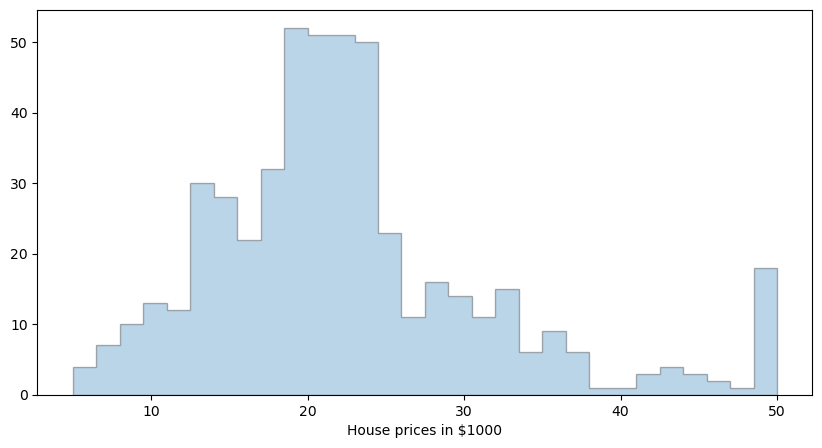

In [5]:
# Distribuzione prezzi
plt.figure(figsize=(10, 5))
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=30, ec="k")
plt.hist(y, **kwargs)
plt.xlabel("House prices in $1000")
plt.show()
plt.show()

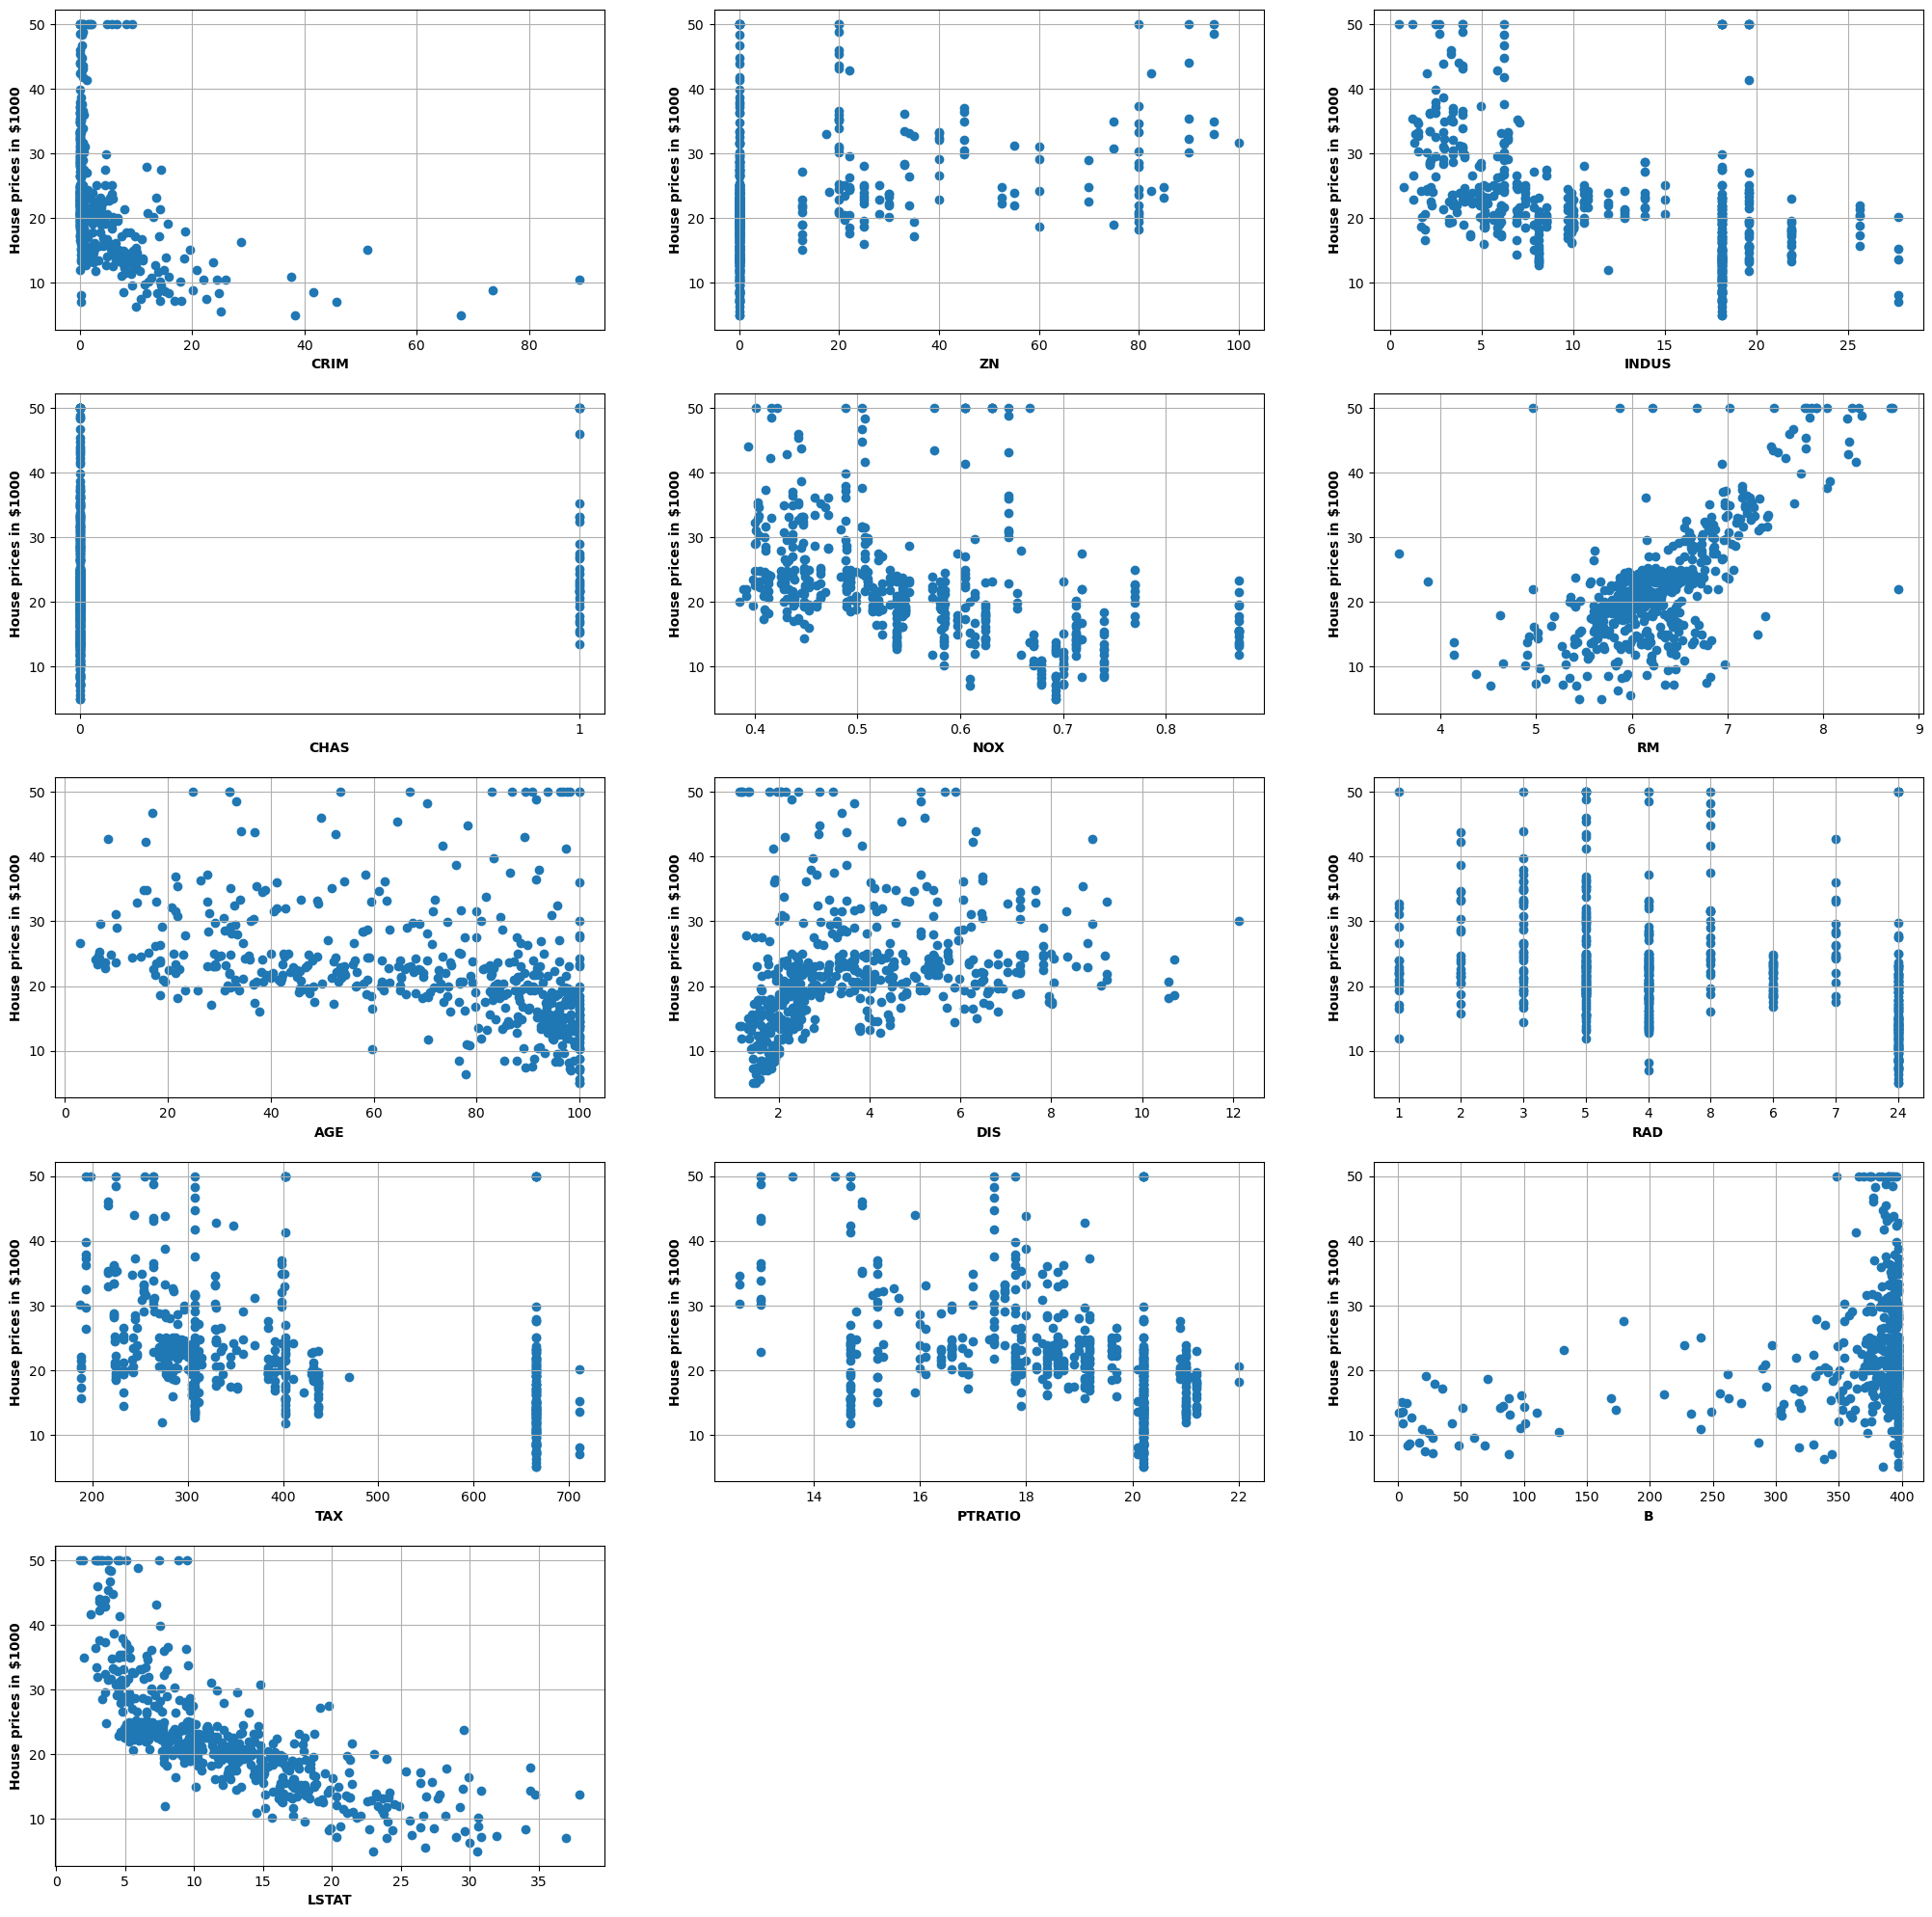

In [6]:
# Plot (feature, target) plot, for each single feature
plt.figure(figsize=(25, 25))
for idx_f, feat_name in enumerate(boston.feature_names):
  plt.subplot(5, 3 , idx_f + 1)
  plt.scatter(x[:, idx_f], y, marker='o')
  plt.xlabel(feat_name, fontweight='bold')
  plt.ylabel('House prices in $1000', fontweight='bold')
  plt.grid(True)
plt.show()

# REGRESSIONE LINEARE SEMPLICE

In [8]:
# variabile LSTAT
x_lstat = x[:, -1].reshape(-1,1)
y_price = y.reshape(-1,1)

# info
print(x_lstat.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [9]:
# dividere dataset in dati di training e dati di test
x_train, x_test, y_train, y_test = train_test_split(x_lstat, y_price, test_size=0.2, random_state=5)
num_tr = len(x_train)
num_feat = x_train.shape[-1]


print(x_train.shape)
x_train = np.concatenate([x_train, np.ones([num_tr, 1])], -1)
print(x_train.shape)
print(f'Total samples in X_train: {num_tr}')

(404, 1)
(404, 2)
Total samples in X_train: 404


In [10]:
# Funzione di costo
display(Math(r'J(w) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right)^2 \tag{2}'))

# h
display(Math(r'h_w(x) = w^T x = w_0 + w_1 x_1 \tag{3}'))

# Discesa del Gradiente
display(Math(r'w_j := w_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right) x_j^{(i)} \tag{4}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
# previsione (h)
def predict(x, w):
    """
    Compute the prediction of a linear model.
    Inputs:
        x: np.ndarray input data of shape [num_samples, num_feat + 1]
        w: np.ndarray weights of shape [num_feat + 1, 1]
    Outputs:
        h: np.ndarray predictions of shape [num_samples, 1]
    """
  
    h=np.dot(x,w)
    return h

In [26]:
# funzione di costo
def compute_cost(x, y, w):
    """
    Inputs:
        x: np.ndarray input data of shape [num_samples, num_feat + 1]
        y: np.ndarray targets data of shape [num_samples, 1]
        w: np.ndarray weights of shape [num_feat + 1, 1]
    Outputs:
        mse: scalar.
    """
    m=  x.shape[0]
    mse = np.sum((y-predict(x,w))**2)/(2*m)
    return mse

In [32]:
# Discesa del gradiente
def gradient_descent(x, y, w, learning_rate, num_iters):
    """
    Inputs:
        x: np.ndarray input data of shape [num_samples, num_feat + 1]
        y: np.ndarray targets data of shape [num_samples, 1]
        w: np.ndarray weights of shape [num_feat + 1, 1]
        learning_rate: scalar, the learning rate.
        num_iters: int, the number of iterations.
    Outputs:
        j_hist: list of loss values of shape [num_iters]
        w_opt: [num_feat + 1, 1]
        w_hist: [num_feat + 1, num_iters + 1]
    """
    
    n_sample, n_feat =len(x), len(w)-1
    j_hist = np.zeros([num_iters])
    w_hist = w
    for i in range(num_iters):
        h=np.dot(x,w)
        dw=np.dot((h-y).T,x).T / n_sample
        w = w - learning_rate * dw
        w_hist=np.append(w_hist, w, 1)
        j_hist[i] =  compute_cost(x,y,w)
    w_opt = w_hist[:,(np.argmin(j_hist)+1)].reshape(-1,1)
    return j_hist, w_opt, w_hist

Initial cost is:  299.3892202970296
Optimal parameters are: 
 [[-0.9220513884968803]
 [33.924533854407684]]
Final cost is:  19.337357868483345


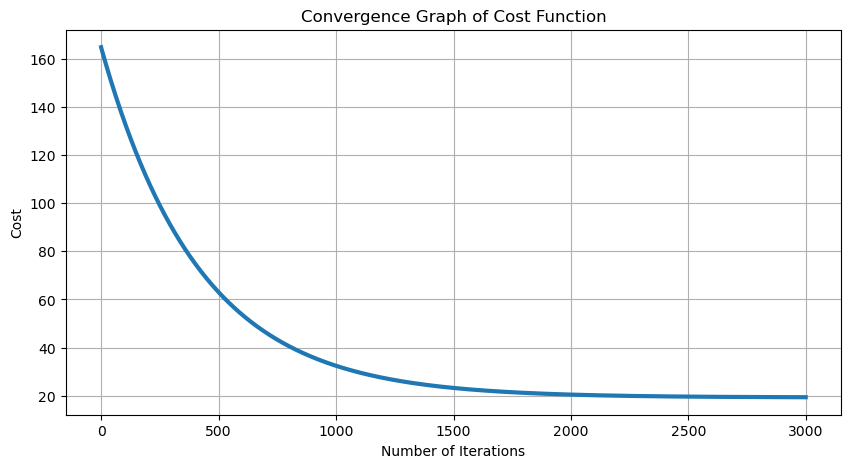

In [34]:
# Inizializzare parametri del modello
w = np.zeros([num_feat + 1, 1])

# Parametri del Gradiente discendente
num_iters = 3000
learning_rate = 0.005

# Calcolo del costo iniziale
initial_cost = compute_cost(x_train, y_train, w)
print("Initial cost is: ", initial_cost)

# Applicazione dell'algoritmo discesa del gradiente
j_hist, w_opt, w_hist = gradient_descent(x_train, y_train, w, learning_rate, num_iters)
print("Optimal parameters are: \n", w_opt)
print("Final cost is: ", j_hist[-1])

# Funzione di costo
plt.figure(figsize=(10, 5))
plt.plot(range(len(j_hist)), j_hist, lw=3)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

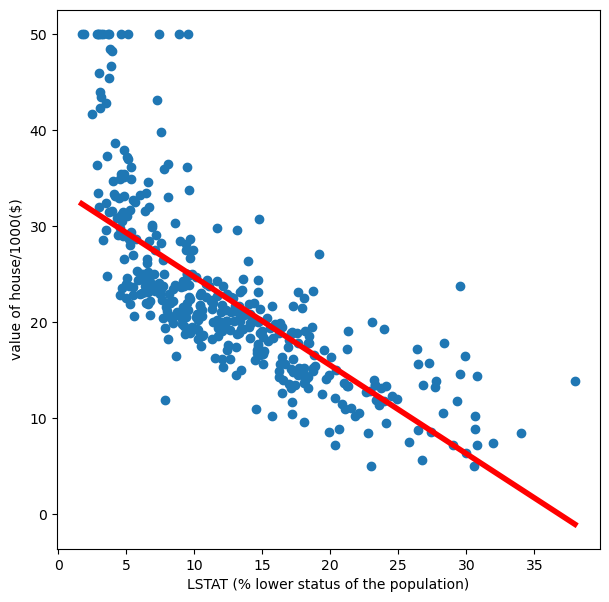

In [36]:
# Linea di regressione sull'output
plt.figure(figsize=(7, 7))
prediction_space = np.linspace(x_lstat.min(), x_lstat.max()).reshape(-1,1)
prediction_space = np.concatenate([prediction_space, np.ones([len(prediction_space), 1])], -1)
plt.scatter(x_train[:, 0], y_train)
plt.plot(
    prediction_space[:, 0],
    predict(
        prediction_space,
        w_opt
    ),
    color='r', linewidth=4
)
plt.ylabel('value of house/1000($)')
plt.xlabel('LSTAT (% lower status of the population)')
plt.show()

Text(0.5, 0.92, 'J(w0, w1)')

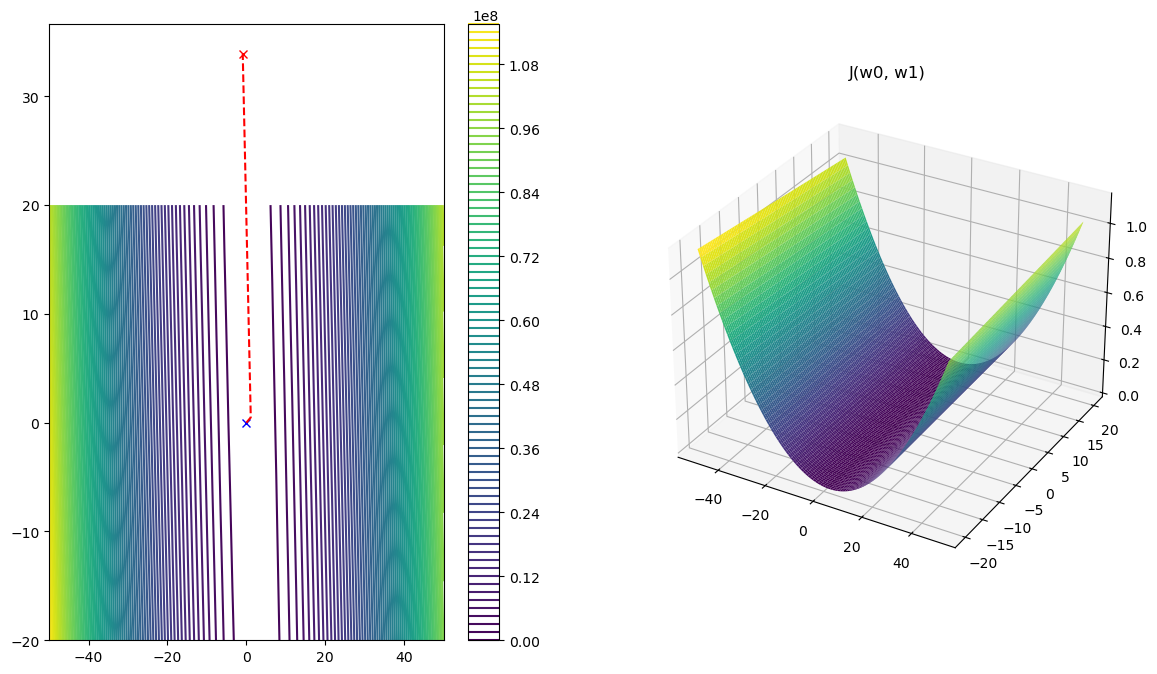

In [38]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1,2,1)


w0_values = np.linspace(-50, 50, 100);
w1_values = np.linspace(-20, 20, 100);
W0, W1 = np.meshgrid(w0_values, w1_values)
J = np.zeros((w0_values.shape[0] * w1_values.shape[0]))

#funzione di costo per ogni punto della griglia
for i, (w0,w1) in enumerate(zip(np.ravel(W0), np.ravel(W1))):
  w = [w0, w1]
  J[i] = compute_cost(x_train, y_train, w)

J = J.reshape(w0_values.shape[0], w1_values.shape[0])

# funzione costo
plt.contour(W0, W1, J, 100)
plt.colorbar()

# Parametri
plt.plot(w_hist[0, 0], w_hist[1, 0], 'bx', # Initial position
         w_hist[0, -1], w_hist[1, -1], 'rx', # Final position
         w_hist[0, ::10], w_hist[1, ::10], 'r--')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(W0, W1, J, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax2.set_title('J(w0, w1)')

# REGRESSIONE LINEARE MULTIPLA

In [57]:
# Standardizzazione variabili
# Divisione dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
num_tr = len(x_train)
num_feat = x_train.shape[-1]

xtrain = x_train.astype(float)
xtest = x_test.astype(float)

# Standardizzazione
mu = (xtrain.mean(axis=0)) # Mean from the train set
sigma = xtrain.std(axis=0) # STD from the train set

xtest = (xtest - mu) / sigma 
y_train = np.array(y_train, dtype=float).reshape(-1, 1)

# Add intercept term
x_train = np.concatenate([x_train, np.ones([num_tr, 1])], -1)
x_test = np.concatenate([x_test, np.ones([len(x_test), 1])], -1)
print(x_train.shape)

(404, 14)


In [51]:
# funzione di costo multivariata

display(Math(r'J(w) = \frac{1}{2m} (Xw - y)^T (Xw - y)'))

<IPython.core.display.Math object>

In [53]:
def compute_cost_multivariate(x, y, w):
    """
    Inputs:
        x: np.ndarray input data of shape [num_samples, num_feat + 1]
        y: np.ndarray targets data of shape [num_samples, 1]
        w: np.ndarray weights of shape [num_feat + 1, 1]
    Outputs:
        mse: scalar.
    """


    m = x.shape[0]
    error = x @ w - y  # (Xw - y)
    cost = (1 / (2 * m)) * (error.T @ error)
    return cost

In [59]:
# Initialize the weights of the linear model
w = np.zeros((num_feat + 1, 1))

# Parameters of the gradient descent
num_iters = 5000
learning_rate = 0.01

# Comput the initial cost
initial_cost = compute_cost_multivariate(x_train, y_train, w)
print("Initial cost is: ", initial_cost, "\n")

# Gradient descent
(j_hist, w_opt, _) = gradient_descent(x_train, y_train, w, learning_rate, num_iters)

# Output info
print("Optimal parameters are: \n", w_opt, "\n")
print("Final cost is: ", j_hist[-1])
plt.figure(figsize=(10, 5))
plt.plot(range(len(j_hist)), j_hist, lw=3)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'